In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visual_behavior.database as db
from visual_behavior.data_access import loading

pd.set_option('display.max_columns', 500)

from multiprocessing import Pool

from allensdk.brain_observatory.behavior.behavior_session import BehaviorSession
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession
from visual_behavior.translator.foraging2 import data_to_change_detection_core

import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

In [3]:
## load the PKL file
behavior_session_id = 947052898 #855964272
pkl_path = db.get_pkl_path(behavior_session_id)
data = pd.read_pickle(pkl_path)

In [4]:
## replicate the functionality of allensdk.brain_observatory.behavior.sync.frame_time_offset
from itertools import chain
import scipy.stats as sps

events = [trial["events"] for trial in data["items"]["behavior"]["trial_log"]]

trial_by_frame = list(chain([event[i][-2:] for event in events for i in [0, -1]]))

times = [trials[0] for trials in trial_by_frame]
frames = [trials[1] for trials in trial_by_frame]

time_to_first_vsync = sps.linregress(frames, times).intercept

print(time_to_first_vsync)

-35.817214133528296


<IPython.core.display.Javascript object>


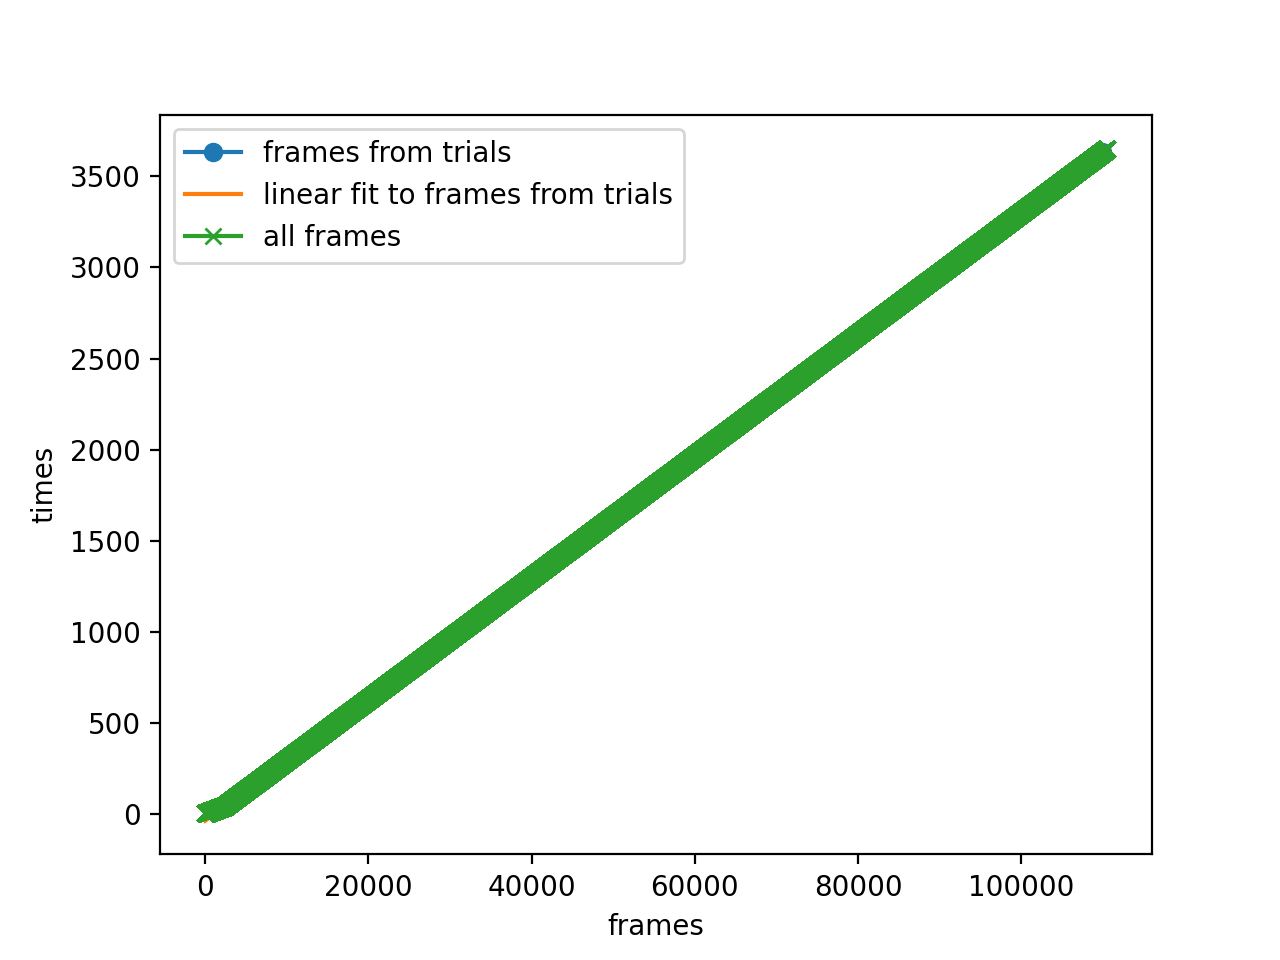

In [5]:
fig,ax = plt.subplots()
ax.plot(frames, times, marker = 'o')

linregress = sps.linregress(frames, times)

ax.plot(
    [0]+frames,
    linregress.slope*np.array([0]+frames) + linregress.intercept
)

ax.set_xlabel('frames')
ax.set_ylabel('times')

alternate_times = (
    np.hstack((0, data['items']['behavior']['intervalsms'])).cumsum() / 1000.0 + 
    data['items']['behavior']['stimuli']['grating']['set_log'][0][2]
)
alternate_frames = np.arange(len(alternate_times))

ax.plot(
    alternate_frames,
    alternate_times,
    marker = 'x'
)

ax.legend(['frames from trials','linear fit to frames from trials','all frames'])

# ax.set_xlim(-10,1500)
# ax.set_ylim(-20,40)

<IPython.core.display.Javascript object>


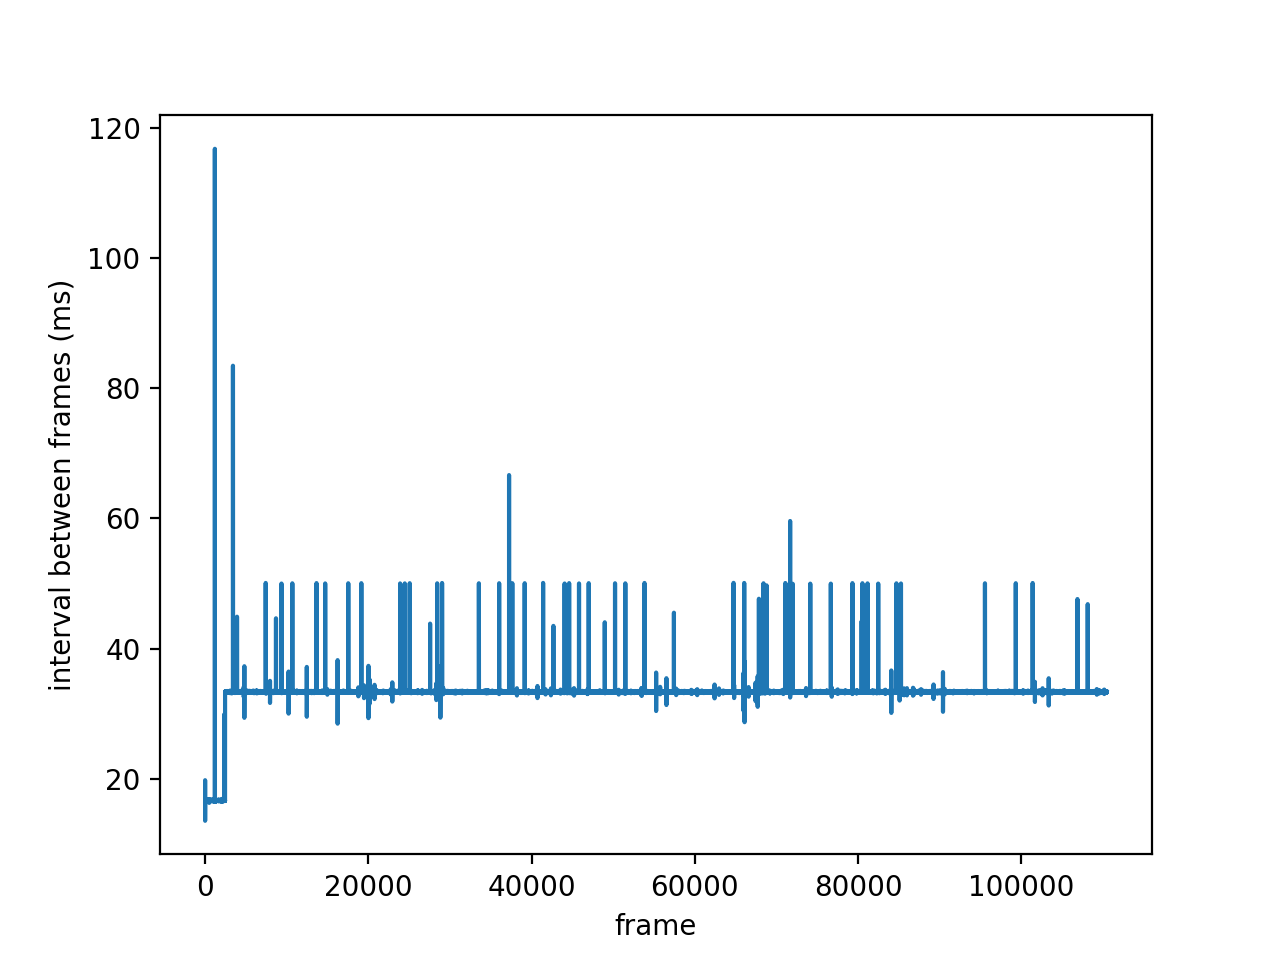

Text(0, 0.5, 'interval between frames (ms)')

In [6]:
fig,ax = plt.subplots()
ax.plot(data['items']['behavior']['intervalsms'])
ax.set_xlabel('frame')
ax.set_ylabel('interval between frames (ms)')

In [7]:
data['items']['behavior']['stimuli']['grating']['set_log'][:10]

[('Ori', 90, 4.657115472795022, 0),
 ('Ori', 180, 27.249717678724846, 1344),
 ('Ori', 270, 39.52693416145367, 2080),
 ('Ori', 0, 72.02027945750613, 3237),
 ('Ori', 90, 204.23315681701177, 7198),
 ('Ori', 180, 276.3803701049, 9360),
 ('Ori', 270, 510.6962130379292, 16381),
 ('Ori', 0, 549.3293556188638, 17539),
 ('Ori', 270, 571.0979130904041, 18191),
 ('Ori', 0, 612.4503453904078, 19430)]

In [8]:
session = BehaviorSession.from_lims(behavior_session_id)
session.stimulus_presentations.iloc[:10]

,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,phase,spatial_frequency,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,,,,
0,2.468740,1345.0,1,gratings_90.0,grating,0,False,90.0,0.25,0.04,1197.0,-15.733854,-13.265114
1,12.277193,2081.0,2,gratings_180.0,grating,1,False,180.0,0.25,0.04,1345.0,-13.265114,-0.987921
2,32.511605,3238.0,3,gratings_270.0,grating,2,False,270.0,0.25,0.04,2081.0,-0.987921,31.523684
3,132.213349,7199.0,0,gratings_0.0,grating,3,False,0.0,0.25,0.04,3238.0,31.523684,163.737033
4,72.178662,9361.0,1,gratings_90.0,grating,4,False,90.0,0.25,0.04,7199.0,163.737033,235.915696
5,234.284159,16382.0,2,gratings_180.0,grating,5,False,180.0,0.25,0.04,9361.0,235.915696,470.199855
6,38.633249,17540.0,3,gratings_270.0,grating,6,False,270.0,0.25,0.04,16382.0,470.199855,508.833103
7,21.768512,18192.0,0,gratings_0.0,grating,7,False,0.0,0.25,0.04,17540.0,508.833103,530.601616
8,41.352255,19431.0,3,gratings_270.0,grating,8,False,270.0,0.25,0.04,18192.0,530.601616,571.953871


In [9]:
core_data = data_to_change_detection_core(data)
core_data['visual_stimuli'].iloc[:10]

,orientation,image_name,image_category,frame,end_frame,time,duration
0,90,NaN,NaN,1197,1345,20.083360,2.468740
1,180,NaN,NaN,1345,2081,22.552100,12.277193
2,270,NaN,NaN,2081,3238,34.829293,32.511605
3,0,NaN,NaN,3238,7199,67.340898,132.213349
4,90,NaN,NaN,7199,9361,199.554247,72.178662
5,180,NaN,NaN,9361,16382,271.732910,234.284159
6,270,NaN,NaN,16382,17540,506.017069,38.633249
7,0,NaN,NaN,17540,18192,544.650317,21.768512
8,270,NaN,NaN,18192,19431,566.418830,41.352255
9,0,NaN,NaN,19431,20768,607.771085,44.604850


In [10]:
# fig, ax = plt.subplots(1,4,figsize=(15,10))
# for ii,trial_type in enumerate(['hit', 'miss','fa','cr']):
#     trials = session.trials.query('@trial_type')
#     for idx,row in trials.reset_index().iterrows():
        

In [11]:
session.trials.columns

Index(['lick_times', 'reward_time', 'reward_volume', 'hit', 'false_alarm',
       'miss', 'stimulus_change', 'aborted', 'go', 'catch', 'auto_rewarded',
       'correct_reject', 'start_time', 'stop_time', 'trial_length',
       'response_time', 'change_frame', 'change_time', 'response_latency',
       'initial_image_name', 'change_image_name'],
      dtype='object')

In [58]:
from allensdk.brain_observatory.behavior.behavior_session import BehaviorSession
behavior_session_id = 1050283960
session = BehaviorSession.from_lims(behavior_session_id)
session.trials

,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time,stop_time,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,"[28.55073829557159, 28.750900495595943, 28.967...",NaN,0.005,False,False,False,True,False,False,False,True,False,25.919769,32.708757,6.788988,28.550738,196.0,28.217111,0.333627,gratings_270,gratings_180
1,[33.338060395590674],NaN,0.000,False,False,False,False,True,False,False,False,False,32.709329,33.659422,0.950093,NaN,NaN,NaN,NaN,gratings_180,gratings_180
2,"[36.94102139564575, 37.09115209561651]",NaN,0.000,False,False,False,False,True,False,False,False,False,33.659991,37.395808,3.735818,NaN,NaN,NaN,NaN,gratings_180,gratings_180
3,"[44.51398529557855, 44.64743379564834, 44.7475...",NaN,0.005,False,False,False,True,False,False,False,True,False,37.396271,46.953875,9.557604,44.513985,1049.0,42.445594,2.068391,gratings_180,gratings_270
4,[48.033566395667094],NaN,0.000,False,False,False,False,True,False,False,False,False,46.954350,48.354953,1.400603,NaN,NaN,NaN,NaN,gratings_270,gratings_270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,[],NaN,0.000,False,False,True,True,False,True,False,False,False,3589.979291,3601.171524,11.192234,NaN,214125.0,3596.663208,inf,gratings_180,gratings_270
908,[3603.71912729557],NaN,0.000,False,False,False,False,True,False,False,False,False,3601.172066,3604.040405,2.868339,NaN,NaN,NaN,NaN,gratings_270,gratings_270
909,[],NaN,0.000,False,False,False,False,False,False,True,False,True,3604.040901,3612.964688,8.923788,NaN,214832.0,3615.862483,inf,gratings_270,gratings_270


In [69]:
pkl_path = db.get_pkl_path(behavior_session_id)
data = pd.read_pickle(pkl_path)
core_data = data_to_change_detection_core(data)
core_data['trials']

,index,lick_times,auto_rewarded,cumulative_volume,cumulative_reward_number,reward_volume,reward_times,reward_frames,rewarded,optogenetics,response_type,response_time,change_time,change_frame,response_latency,starttime,startframe,trial_length,scheduled_change_time,endtime,endframe,initial_image_category,initial_image_name,change_image_name,change_image_category,change_ori,change_contrast,initial_ori,initial_contrast,delta_ori
0,0,"[28.555511, 28.7557401, 28.9726096, 29.106005,...",True,0.005,1,0.005,[28.3547834],[205],True,False,[],[],28.205014,196.0,inf,25.919769,59,6.788988,2.279470,32.708757,466,,,,,180,None,270,None,-90
1,1,[33.3429127],True,0.005,1,0.000,[],[],True,False,[],[],NaN,NaN,NaN,32.709329,466,0.950093,5.028255,33.659422,523,,,,,180,None,180,None,0
2,2,"[36.9458314, 37.0959547]",True,0.005,1,0.000,[],[],True,False,[],[],NaN,NaN,NaN,33.659991,523,3.735818,5.028255,37.395808,747,,,,,180,None,180,None,0
3,3,"[44.5187832, 44.6522927, 44.7523042, 44.885769...",True,0.010,2,0.005,[42.5832637],[1058],True,False,[],[],42.433457,1049.0,inf,37.396271,747,9.557604,5.028255,46.953875,1320,,,,,270,None,180,None,90
4,4,[48.038515],True,0.010,2,0.000,[],[],True,False,[],[],NaN,NaN,NaN,46.954350,1320,1.400603,2.997142,48.354953,1404,,,,,270,None,270,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,907,[],False,0.860,92,0.000,[],[],True,False,[],[],3596.651096,214125.0,inf,3589.979291,213725,11.192234,6.659657,3601.171524,214396,,,,,270,None,180,None,90
908,908,[3603.7239393],None,0.860,92,0.000,[],[],False,False,[],[],NaN,NaN,NaN,3601.172066,214396,2.868339,4.404536,3604.040405,214568,,,,,270,None,270,None,0
909,909,[],None,0.860,92,0.000,[],[],False,False,[],[],3608.444105,214832.0,inf,3604.040901,214568,8.923788,4.404536,3612.964688,215103,,,,,270,None,270,None,0
910,910,[],False,0.860,92,0.000,[],[],True,False,[],[],3615.850508,215276.0,inf,3612.965314,215103,7.405499,2.883699,3620.370814,215547,,,,,0,None,270,None,-270


In [90]:
def compare_trials(row, interface):
    if interface == 'sdk':
        value_dict = {
            'change_reward_lag': row['reward_time'] - row['change_time'] if row['reward_time'] and row['change_time'] else None,
            'change_lick_lag': row['lick_times'][0] - row['change_time'] if len(row['lick_times']) > 0 and row['change_time'] else None,
        }
    elif interface == 'vba':
        value_dict = {
            'change_reward_lag': row['reward_times'][0] - row['change_time'] if len(row['reward_times']) > 0 and row['change_time'] else None,
            'change_lick_lag': row['lick_times'][0] - row['change_time'] if len(row['lick_times']) > 0 and row['change_time'] else None,
        }
#     value_dict.update({'trial_type'})
    return value_dict

In [100]:
def get_behavior_session_id_from_ophys_experiment_id(ophys_experiment_id):
    query = '''
        select bs.id
        from ophys_experiments as oe
        join ophys_sessions as os on oe.ophys_session_id = os.id
        join behavior_sessions as bs on os.foraging_id = bs.foraging_id
        where oe.id = {}
    '''
    return db.lims_query(query.format(ophys_experiment_id))

In [101]:
def open_vba_session(behavior_session_id):
    pkl_path = db.get_pkl_path(behavior_session_id)
    data = pd.read_pickle(pkl_path)
    core_data = data_to_change_detection_core(data)
    return core_data


In [138]:
## define a function to determine if columns in a given row are the same
def is_same(row, column_name, tolerance = 0.05):
    '''check if columns in a given row are the same'''
    # if column diff is not null, check if it is within tolerance
    if pd.notnull(row['{}_diff'.format(column_name)]):
        is_same = row['{}_diff'.format(column_name)] < tolerance
    # otherwise, ensure that both corresponding columns are null (one being null and the other having a value indicates a problem)
    else:
        is_same = pd.isnull(row['{}_sdk'.format(column_name)]) and pd.isnull(row['{}_vba'.format(column_name)])
    return is_same

def compare_vba_sdk_trials(behavior_session_id = None, ophys_experiment_id = None):
    
    ## open session with SDK (either BehaviorOphysSession or BehaviorSession)
    if ophys_experiment_id:
        session = BehaviorOphysSession.from_lims(ophys_experiment_id)
        # get the behavior session ID if the ophys session ID was passed
        behavior_session_id = get_behavior_session_id_from_ophys_experiment_id(ophys_experiment_id)
    elif behavior_session_id:
        session = BehaviorSession.from_lims(behavior_session_id)
    sdk_trials = session.trials

    # open vba session (aka 'core_data')
    core_data = open_vba_session(behavior_session_id)
    vba_trials = core_data['trials']

    # get values for both data types
    sdk_values = pd.DataFrame([compare_trials(row, interface='sdk') for idx, row in sdk_trials.iterrows()])
    vba_values = pd.DataFrame([compare_trials(row, interface='vba') for idx, row in vba_trials.iterrows()])

    # merge 'em together
    comparison_df = pd.merge(
        left = sdk_values,
        right = vba_values,
        left_index = True,
        right_index = True,
        suffixes = ['_sdk', '_vba']
    )
    
    # do comparison for each column type
    for column in sdk_values.columns:
        # get the diff
        comparison_df['{}_diff'.format(column)] = abs(comparison['{}_sdk'.format(column)] - comparison['{}_vba'.format(column)])
        # check to see if diff matches
        comparison_df['{}_matches'.format(column)] = comparison_df.apply(is_same, column_name=column, axis=1)
        
    
    return comparison_df

In [150]:
def check_comparison(comparison_df):
    cols_to_check = [col for col in comparison_df.columns if col.endswith('matches')]
    return {col:comparison_df[col].all() for col in cols_to_check}

In [141]:
comparison_df = compare_vba_sdk_trials(behavior_session_id = 1050283960)

In [151]:
check_comparison(comparison_df)

{'change_reward_lag_matches': False, 'change_lick_lag_matches': False}

In [152]:
comparison_df = compare_vba_sdk_trials(ophys_experiment_id = 849233396)

ERROR:visual_behavior.translator.foraging2.extract:intervalsms record appears to be missing entries


In [153]:
comparison_df

,change_reward_lag_sdk,change_lick_lag_sdk,change_reward_lag_vba,change_lick_lag_vba,change_reward_lag_diff,change_reward_lag_matches,change_lick_lag_diff,change_lick_lag_matches
0,NaN,NaN,NaN,NaN,NaN,True,0.016870,True
1,NaN,NaN,NaN,NaN,NaN,True,NaN,True
2,NaN,NaN,NaN,NaN,NaN,True,NaN,True
3,NaN,NaN,NaN,NaN,NaN,True,0.016935,True
4,NaN,NaN,NaN,NaN,NaN,True,NaN,True
...,...,...,...,...,...,...,...,...
539,NaN,NaN,NaN,NaN,NaN,True,NaN,True
540,NaN,NaN,NaN,NaN,NaN,True,NaN,True
541,NaN,NaN,NaN,NaN,2.171538,False,0.016954,True
542,NaN,NaN,NaN,NaN,NaN,True,NaN,True


In [114]:

comparison.apply(is_same, column_name='change_lick_lag', axis=1)

0       True
1      False
2      False
3       True
4      False
       ...  
907    False
908    False
909    False
910    False
911     True
Length: 912, dtype: bool

## is this an issue in ophys too?

In [23]:


et = loading.get_filtered_ophys_experiment_table()
et.sample(100)

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,...,cre_line,session_tags,failure_tags,session_type_exposure_number,prior_exposures_to_image_set,prior_exposures_to_omissions,model_outputs_available,location,has_events,session_number
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
885146787,884613038,884808160,1018027561,VisualBehaviorMultiscope,published,passed,20190611_451787_4imagesB,OPHYS_4_images_B,MESO.1,2019-06-11 11:43:04.000000,...,Slc17a7-IRES2-Cre,NaN,NaN,2,2.0,NaN,True,Slc17a7_VISl_225,False,4
867410509,867027875,867098393,1018028429,VisualBehaviorMultiscope,published,passed,20190513_448366_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-05-13 12:36:19.000000,...,Sst-IRES-Cre,NaN,NaN,0,10.0,NaN,False,Sst_VISp_225,False,2
936500627,935559843,935811563,1026722876,VisualBehaviorMultiscope,published,passed,20190830_6_Images_B_453988,OPHYS_6_images_B,MESO.1,2019-08-30 09:36:00.434110,...,Vip-IRES-Cre,NaN,NaN,0,4.0,NaN,True,Vip_VISl_276,True,6
992870927,992783847,992815106,989461845,VisualBehaviorTask1B,published,passed,20191206_485688_3imagesB,OPHYS_3_images_B,CAM2P.3,2019-12-06 20:29:45.000000,...,Sst-IRES-Cre,NaN,NaN,0,21.0,NaN,True,Sst_VISp_275,False,3
951213217,950031363,950188644,1022731544,VisualBehaviorMultiscope,published,passed,20190919_453991_Ophys6,OPHYS_6_images_B,MESO.1,2019-09-19 11:03:22.423965,...,Vip-IRES-Cre,NaN,parent_averaged_depth_image_5,0,2.0,NaN,True,Vip_VISl_225,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958527485,954954402,953982960,1018028351,VisualBehaviorMultiscope,published,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,Sst-IRES-Cre,NaN,NaN,0,67.0,NaN,True,Sst_VISl_75,True,3
1050730726,1050241911,1050263298,1045477185,VisualBehaviorTask1B,published,passed,20200914_533161_Session6,OPHYS_6_images_A,CAM2P.4,2020-09-14 17:24:05.000000,...,Slc17a7-IRES2-Cre,NaN,NaN,1,4.0,NaN,False,Slc17a7_VISp_175,True,6
820307518,819949602,820124540,812858755,VisualBehavior,published,passed,20190129_431023_VISp_175um_6,OPHYS_6_images_B,CAM2P.5,2019-02-07 22:00:18.000000,...,Slc17a7-IRES2-Cre,NaN,NaN,0,4.0,NaN,True,Slc17a7_VISp_175,False,6


In [41]:
def get_first_frame_offset(ophys_experiment_id):
    api = BehaviorOphysSession
    try:
        dataset = api.from_lims(ophys_experiment_id)
        offset = dataset.stimulus_timestamps[0]
    except:
        offset = np.nan
    return {'ophys_experiment_id':ophys_experiment_id, 'first_frame_offset':offset}

In [45]:
with Pool(32) as pool:
    offset_df = pd.DataFrame(pool.map(get_first_frame_offset, et.sample(1000).index.values))

In [46]:
offset_df['first_frame_offset'].describe()

count    990.000000
mean       8.433622
std        1.444521
min        5.335301
25%        7.343310
50%        8.552191
75%        9.272894
max       17.038950
Name: first_frame_offset, dtype: float64

In [156]:
offset_df.sort_values(by='first_frame_offset', ascending=False).iloc[-40:]

,ophys_experiment_id,first_frame_offset
597,964955813,5.891984
496,848697625,5.859495
900,993864050,5.859368
336,871155338,5.858990
899,948514870,5.821757
732,1006511150,5.794032
259,1003122317,5.793016
118,992870927,5.765900
604,848697604,5.755894
502,934476801,5.740580


In [52]:
ophys_experiment_id = 849233396
api = BehaviorOphysSession
dataset = api.from_lims(ophys_experiment_id)
dataset.trials.query('hit')['response_latency'].describe()

count    91.000000
mean      0.399532
std       0.115237
min       0.030842
25%       0.314426
50%       0.381179
75%       0.497947
max       0.698162
Name: response_latency, dtype: float64